# Finite elements method
The finite elements method for solving the steady diffusiton equation
$$ \frac{d}{dx}\left[k(x)\frac{du(x)}{dx}\right] = s(x)$$
was implemented for 1st and 2nd order.

### Getting used to the implementation
The finite elements method is implemented as a class. The documentation is given below.

In [53]:
import numpy as np
import matplotlib.pyplot as plt

%run Finel.py
'''Implements the finite Elements method for a 1D second order differential equation of the form
-d/dx[k(x) * du(d)/dx)] = s(x), where
k(x) is a known system property,
s(x) is a source term
u(x) is the spacially distributed quantity we want to solve for.

It needs two static (diriclet) boundary condicions (BC) left, right
and max. one derivative (van neuman) BC. If a van neumann BC is set,
the diriclet BC is ignored.

INPUTS (correct order)
- x: 1D array of grid points
- k: function of one variable
- s: function of one variable
OPT INPUTS
- order: Order of integration scheme, default: 1
- left: left static (Diriclet) boundary condicion
- right: right static (Diriclet) boundary condicion

IMPORTANT PROPERTIES
- .Diric_left: (input) left diriclet boundary cond.: u(a)
- .Diric_right: (input) right diriclet boundary cond. u(b)
- .Neum_left: (input) value of left van Neumann cond. du(x)/dx|x=a
- .Neum_right: (input) value of right van Neumann cond. du(x)/dx|x=b
- .x: (output) 1D array of grid points
- .u (output) 1D array of solution points

IMPORTANT METHODS
- .solve(): solves the equation
- .plot(): plots result
'''

'Implements the finite Elements method for a 1D second order differential equation of the form\n-d/dx[k(x) * du(d)/dx)] = s(x), where\nk(x) is a known system property,\ns(x) is a source term\nu(x) is the spacially distributed quantity we want to solve for.\n\nIt needs two static (diriclet) boundary condicions (BC) left, right\nand max. one derivative (van neuman) BC. If a van neumann BC is set,\nthe diriclet BC is ignored.\n\nINPUTS (correct order)\n- x: 1D array of grid points\n- k: function of one variable\n- s: function of one variable\nOPT INPUTS\n- order: Order of integration scheme, default: 1\n- left: left static (Diriclet) boundary condicion\n- right: right static (Diriclet) boundary condicion\n\nIMPORTANT PROPERTIES\n- .Diric_left: (input) left diriclet boundary cond.: u(a)\n- .Diric_right: (input) right diriclet boundary cond. u(b)\n- .Neum_left: (input) value of left van Neumann cond. du(x)/dx|x=a\n- .Neum_right: (input) value of right van Neumann cond. du(x)/dx|x=b\n- .x: (

Let's do some examples

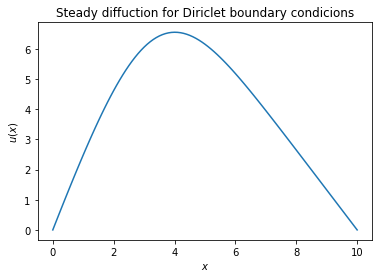

In [54]:
# Example
N = 100
x = np.linspace(0,10,N+1)
k = lambda x: np.ones_like(x) # define simple func in one line
s = lambda x: np.exp(-20*((x-10/3)/10)**2)
A = Finel(x,k,s,order=1)
A.solve()
A.plot()

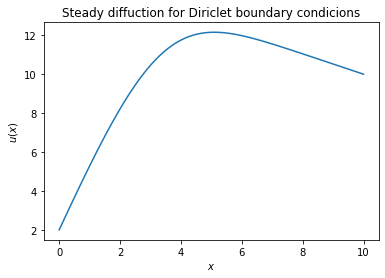

In [46]:
# Example, diriclet boundary condicions different from zero
A.Diric_left = 2
A.Diric_right = 10
A.solve()
A.plot()

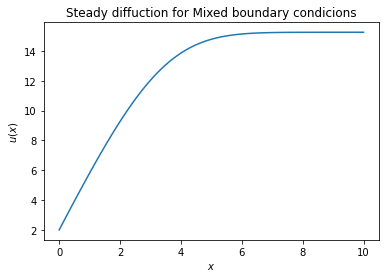

In [47]:
# Example, mixed boundary condicions
A.Diric_left = 2
A.Neum_right = 0
A.solve()
A.plot()

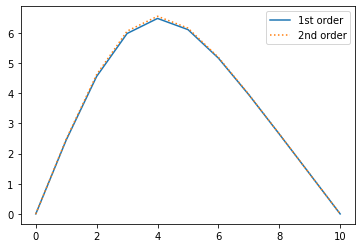

In [61]:
# Example comparing first and second order
N = 10
x = np.linspace(0,10,N+1)
A = Finel(x,k,s,order=1)
A.solve()
N = 5 # the second order should have half the grid points to be fair
x = np.linspace(0,10,N+1)
B = Finel(x,k,s,order=2)
B.solve()

plt.plot(A.x,A.u,label='1st order')
plt.plot(B.x,B.u,label='2nd order',ls='dotted')
plt.legend()

In [62]:
### TIME EVOLUTION MISSING

### Exercises